In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/Users/jiayangdu/Desktop/PWC/data_for_modeling_full.csv")

In [4]:
data

,Unnamed: 0,Unnamed: 0.1,Company_code,S_INFO_COMPNAME,Year,AQI,DSRI,GMI,LVGI,SGAI,...,AMORT_INTANG_ASSETS,DEPR_FA_COGA_DPBA,NET_CASH_FLOWS_FNC_ACT,NET_CASH_FLOWS_INV_ACT,NET_CASH_FLOWS_OPER_ACT,OTHER_CASH_RECP_RAL_FNC_ACT,STOT_CASH_INFLOWS_INV_ACT,STOT_CASH_OUTFLOWS_INV_ACT,free_cash_flow,label
0,0,0,04188CDAEA,新疆华凌工贸(集团)有限公司,2016,-1.972522e+10,-20.334634,-0.065519,-15.811490,-0.561754,...,21915182.56,1.586253e+08,9.820150e+08,-1.814455e+09,1.772392e+08,0.000000e+00,4.879472e+08,2.302402e+09,1.060588e+08,0
1,1,1,04188CDAEA,新疆华凌工贸(集团)有限公司,2017,-4.200354e+10,-18.115388,0.614712,0.262330,0.452986,...,19911466.85,2.053192e+08,4.133297e+08,-6.356601e+08,1.147719e+09,0.000000e+00,1.131764e+08,7.488366e+08,3.255475e+08,0
2,2,2,0447D0907B,香江集团有限公司,2016,-1.972522e+10,-20.336509,0.006532,-16.197931,-0.488244,...,15013286.23,2.241751e+08,8.320808e+08,-1.090605e+09,6.361757e+08,0.000000e+00,2.155847e+10,2.264908e+10,-1.010579e+09,0
3,3,3,0447D0907B,香江集团有限公司,2017,-4.200354e+10,-19.311067,0.087230,0.302211,-0.293802,...,14648009.19,3.048804e+08,-2.381702e+08,-3.661010e+08,3.225848e+08,4.021318e+08,8.959092e+09,9.325193e+09,6.561143e+08,0
4,4,4,0449DD9DA2,天津市津能投资公司,2012,3.287658e+10,-1.676400,0.029466,0.997636,0.360511,...,0.00,0.000000e+00,6.723181e+08,-6.620995e+08,4.506446e+08,0.000000e+00,1.510940e+09,2.173040e+09,4.939034e+08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,14382,14382,zu32At651Q,天津水务投资集团有限公司,2016,-1.972522e+10,-18.802047,0.006882,-15.828077,10.533499,...,0.00,0.000000e+00,1.495293e+09,-1.890732e+09,1.374363e+08,1.429726e+09,7.041923e+06,1.897774e+09,-2.539532e+09,0
14383,14383,14383,zu32At651Q,天津水务投资集团有限公司,2017,-4.200354e+10,-18.750611,0.851723,0.080126,-0.055917,...,0.00,0.000000e+00,6.361759e+08,-1.581661e+09,-5.357604e+06,1.684542e+09,1.012971e+08,1.682958e+09,-1.322144e+09,0
14384,14384,14384,zy02ft6t9K,宁夏晟晏实业集团有限公司,2015,3.858816e+10,-3.609714,0.008879,0.066614,-0.273581,...,47177409.44,3.765693e+08,1.185372e+09,-1.656874e+09,3.233254e+08,0.000000e+00,6.078014e+08,2.264675e+09,-8.328692e+08,0
14385,14385,14385,zy02ft6t9K,宁夏晟晏实业集团有限公司,2016,-1.972522e+10,-19.385580,-0.006746,-16.078809,-0.034774,...,47684130.45,4.233298e+08,1.259456e+08,-4.857463e+08,3.466636e+08,0.000000e+00,1.022152e+09,1.507898e+09,-9.763224e+08,0


In [95]:
data.drop(['Unnamed: 0','Unnamed: 0.1','S_INFO_COMPNAME'], axis=1,inplace=True)

In [96]:
data.set_index('Company_code', inplace = True)

In [97]:
data['AQI'] = pd.qcut(data['AQI'], 10, labels=False)

In [98]:
data['DSRI'] = pd.qcut(data['DSRI'], 10,labels=False)

In [99]:
data['GMI'] = pd.qcut(data['GMI'], 10,labels=False)
data['LVGI'] = pd.qcut(data['LVGI'], 10,labels=False)
data['SGAI'] = pd.qcut(data['SGAI'], 10,labels=False)
data['SGI'] = pd.qcut(data['SGI'], 10,labels=False)
data['TATA'] = pd.qcut(data['TATA'], 10,labels=False)

In [100]:
def nandivide(a,b):
    b = b.apply(lambda x:np.nan if x==0 else x)
    r = a/b 
    return r.fillna(0)

In [101]:
data['XueIdx_1'] = nandivide((data['OPER_PROFIT']+data['LESS_FIN_EXP']+data['DEPR_FA_COGA_DPBA']+data['AMORT_INTANG_ASSETS']),data['TOT_LIAB'])
data['XueIdx_3'] = nandivide((data['TOT_PROFIT']- data['OPER_PROFIT']),data['TOT_PROFIT'].apply(lambda x: np.nan if x<=0 else x))
data['XueIdx_4'] = nandivide((data['ACCT_RCV']+data['NOTES_RCV']+data['OTH_RCV']),data['TOT_CUR_ASSETS'])  
data['LOSS'] = (data['TOT_PROFIT']-data['PLUS_NON_OPER_REV']+data['LESS_NON_OPER_EXP']).apply(lambda x: 1 if x<0 else 0)
data['OTHREC'] = nandivide(data['OTH_RCV'],data['TOT_ASSETS'])
data['size'] = data['TOT_ASSETS'].apply(float)
data['equity'] = data['TOT_ASSETS']-data['TOT_LIAB']
data['cfi'] = nandivide(data['NET_CASH_FLOWS_INV_ACT'],data['NET_CASH_FLOWS_OPER_ACT'].apply(abs))
data['cff'] = nandivide(data['NET_CASH_FLOWS_FNC_ACT'],data['NET_CASH_FLOWS_OPER_ACT'].apply(abs))
data['lin1'] =nandivide(data['OTHER_CASH_RECP_RAL_FNC_ACT'],data['TOT_ASSETS'])
data['Cash Flows from Operations'] = data['NET_CASH_FLOWS_OPER_ACT']
data['lin2'] =nandivide(data['TOT_CUR_LIAB'],data['Cash Flows from Operations'].apply(abs))
data['Sales'] = data['TOT_OPER_REV']
data['lin_1'] = nandivide(data['Sales']-data['Cash Flows from Operations'],data['Sales'])
data['turnover'] = nandivide(data['Sales'],data['INVENTORIES'])
data['lin_5'] = nandivide(data['INVENTORIES'],data['TOT_ASSETS'])

In [102]:
columns = ['XueIdx_1','XueIdx_3','XueIdx_4','LOSS','OTHREC','size','equity','cfi','cff','lin1','lin2','lin_1','turnover','lin_5']
for col in columns:
    data[col] = pd.qcut(data[col],10,duplicates='drop',labels=False)

In [107]:
reg_cols = ['AQI','DSRI','GMI','LVGI','SGAI','SGI','TATA','XueIdx_1','XueIdx_3','XueIdx_4','LOSS','OTHREC','size','equity','cfi','cff','lin1','lin2','lin_1','turnover','lin_5']
x = data[reg_cols]
y = x.corr()

In [108]:
y

,AQI,DSRI,GMI,LVGI,SGAI,SGI,TATA,XueIdx_1,XueIdx_3,XueIdx_4,...,OTHREC,size,equity,cfi,cff,lin1,lin2,lin_1,turnover,lin_5
AQI,1.000000,0.774518,0.146358,0.157809,-0.324540,-0.341969,0.316769,-0.017006,0.157405,0.002816,...,-0.030796,-0.007900,-0.014622,-0.054066,0.017107,0.004582,0.009125,-0.053044,0.043782,-0.024183
DSRI,0.774518,1.000000,0.212182,0.572587,-0.011213,-0.621610,0.347280,0.022373,0.009219,0.031883,...,-0.001930,0.006723,-0.000821,-0.054547,0.023855,-0.006053,0.031547,-0.016102,0.041493,-0.015119
GMI,0.146358,0.212182,1.000000,0.211645,0.011603,-0.323887,0.051091,0.117336,-0.088039,-0.036141,...,-0.079378,-0.008162,0.003152,-0.002581,-0.025134,-0.029005,-0.032215,-0.092260,0.039709,-0.080591
LVGI,0.157809,0.572587,0.211645,1.000000,0.292227,-0.705265,0.131037,0.044225,-0.198396,0.037587,...,0.025102,0.018548,0.003511,-0.057737,0.033724,-0.019253,0.065185,0.027469,0.023097,0.014007
SGAI,-0.324540,-0.011213,0.011603,0.292227,1.000000,-0.185732,-0.060893,0.023636,-0.121410,0.049575,...,0.043501,-0.009631,-0.002487,-0.023392,-0.004766,-0.000733,0.024512,0.038505,-0.011906,0.042010
SGI,-0.341969,-0.621610,-0.323887,-0.705265,-0.185732,1.000000,-0.178950,0.010124,0.150615,-0.004543,...,-0.012933,0.007142,0.005238,-0.043803,0.048356,0.000343,-0.007685,0.011960,0.026930,-0.006910
TATA,0.316769,0.347280,0.051091,0.131037,-0.060893,-0.178950,1.000000,-0.131353,-0.024677,-0.030650,...,0.162131,-0.016168,0.023266,0.067597,0.048600,0.034638,-0.084573,0.170699,-0.219033,0.208810
XueIdx_1,-0.017006,0.022373,0.117336,0.044225,0.023636,0.010124,-0.131353,1.000000,-0.355415,0.048581,...,-0.452865,-0.128792,-0.101653,-0.018413,-0.239637,-0.139036,-0.096232,-0.217272,0.618019,-0.357806
XueIdx_3,0.157405,0.009219,-0.088039,-0.198396,-0.121410,0.150615,-0.024677,-0.355415,1.000000,0.076226,...,0.245137,-0.032072,0.020905,-0.067222,0.125016,0.072694,0.032310,0.070054,-0.205321,0.142819
XueIdx_4,0.002816,0.031883,-0.036141,0.037587,0.049575,-0.004543,-0.030650,0.048581,0.076226,1.000000,...,0.381036,-0.072493,-0.099698,-0.072336,-0.046296,0.079768,0.130144,-0.002083,0.282994,-0.310251


In [110]:
# drop Loss
import statsmodels.api as sm
reg_cols = ['AQI','DSRI','GMI','LVGI','SGAI','SGI','TATA','XueIdx_1','XueIdx_3','XueIdx_4','OTHREC','size','equity','cfi','cff','lin1','lin2','lin_1','turnover','lin_5']
logit = sm.Logit(data['label'], data[reg_cols])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.046435
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                14387
Model:                          Logit   Df Residuals:                    14367
Method:                           MLE   Df Model:                           19
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.2360
Time:                        02:34:38   Log-Likelihood:                -668.06
converged:                       True   LL-Null:                       -874.44
Covariance Type:            nonrobust   LLR p-value:                 9.715e-76
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
AQI            0.0287      0.062      0.466      0.641      -0.092       0.149
DSRI           0.0348      0

In [121]:
reg_cols = ['GMI','LVGI','SGAI','SGI','TATA','XueIdx_1','XueIdx_3','XueIdx_4','OTHREC','size','equity','cfi','cff','lin1','lin_1','lin_5']
logit = sm.Logit(data['label'], data[reg_cols])
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.046549
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                14387
Model:                          Logit   Df Residuals:                    14371
Method:                           MLE   Df Model:                           15
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.2341
Time:                        02:41:17   Log-Likelihood:                -669.71
converged:                       True   LL-Null:                       -874.44
Covariance Type:            nonrobust   LLR p-value:                 7.061e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GMI           -0.0366      0.029     -1.257      0.209      -0.094       0.020
LVGI          -0.0500      0

In [122]:
pred = result.predict(data[reg_cols]) #生成预测值

In [126]:
def confusion_matrix(pred,real):
    x = pd.DataFrame()
    x['label'] = real
    x['predict'] = pred

    TruePositive = sum(x[x['predict']==1]['label']) #取预测为1的，并且真实为1的样本数量总和
    FalsePositive = sum(1-x[x['predict']==1]['label'])
    TrueNegative = sum(1-x[x['predict']==0]['label'])
    FalseNegative = sum(x[x['predict']==0]['label'])

    Precision = TruePositive/(TruePositive+FalsePositive)
    Recall = TruePositive/(TruePositive+FalseNegative)
    print('Precision: {}'.format(Precision))
    print('Recall: {}'.format(Recall))
    _confusion_matrix = pd.DataFrame({
                    'Negative':{'True':FalseNegative,'False':TrueNegative},
                    'Positive':{'True':TruePositive,'False':FalsePositive}                            
                    })        
    print(_confusion_matrix)
    return _confusion_matrix

In [127]:
pred = result.predict(data[reg_cols])
for t in [1e-5,1e-4,1e-3,1e-2]:
    print(t)
    pred2 = pred.apply(lambda x: 1 if x>t else 0)
    real = data['label']
    confusion_matrix(pred2,real)

1e-05
Precision: 0.011051643845137972
Recall: 1.0
       Negative  Positive
True          0       159
False         0     14228
0.0001
Precision: 0.011069340016708437
Recall: 1.0
       Negative  Positive
True          0       159
False        23     14205
0.001
Precision: 0.01380991064175467
Recall: 0.9622641509433962
       Negative  Positive
True          6       153
False      3302     10926
0.01
Precision: 0.03944315545243619
Recall: 0.7484276729559748
       Negative  Positive
True         40       119
False     11330      2898


In [128]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

def illus_roc_curve(real,pred):
    # Compute ROC curve and ROC area for each class 
    
    fpr,tpr,threshold = roc_curve(real, pred) ###计算真正率和假正率
    roc_auc = auc(fpr,tpr) ###计算auc的值
    lw = 2
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

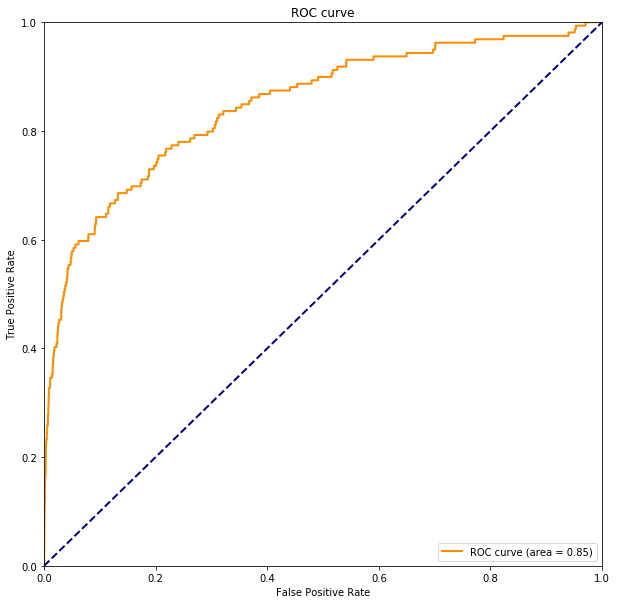

In [129]:
illus_roc_curve(real,pred)